## Loan Default

In [1]:
# Libraries
import pandas as pd # Dataframes
import numpy as np
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.preprocessing import OneHotEncoder # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import missingno as msno # Visualizing null values
from sklearn.impute import KNNImputer # Filling in null values for numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


C:\Users\JHest\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Read in data
df = pd.read_csv('Loan_Default.csv')

# First 5 entries
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
# Convert all column names to lowercase
df.columns=df.columns.str.lower()

# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

In [4]:
# Make ID a year
df['id'] = df['id'].astype(str)

# Drop year since all entries are 2019
df.drop(columns=['year'], inplace=True)

# Columns
print(df.columns)

Index(['id', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')


In [5]:
# Null values
nas = df.isna().sum()
print(nas)

id                               0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                 

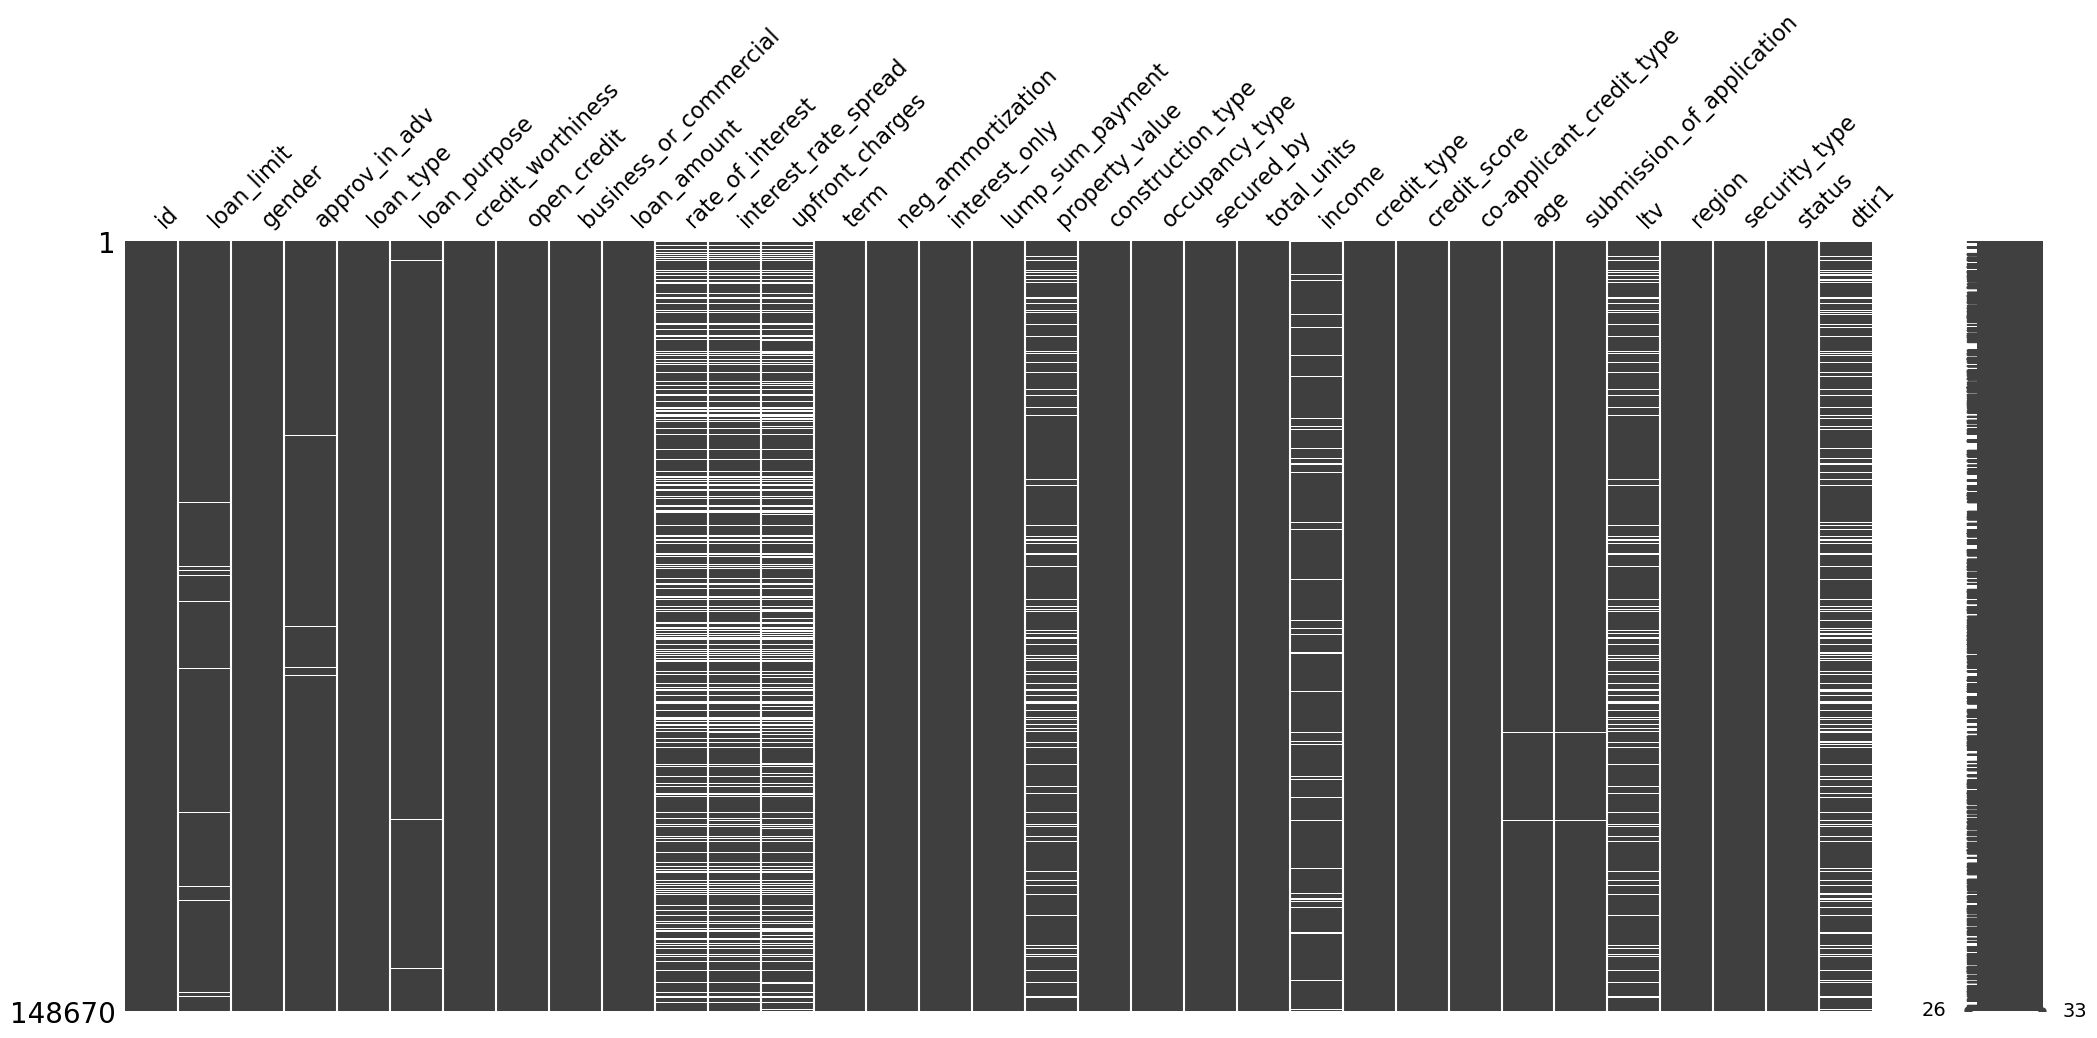

<Figure size 1500x900 with 0 Axes>

In [7]:
# Visualizing Null Values
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()


In [8]:
# Getting dataframes by datatype
dtypes = pd.DataFrame(df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [9]:
# ====================================================================
# Imputing: Numeric Data
# ====================================================================

# Numeric Dataframe
df_num = df[num_vars]

# knn
knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)

# Check for any nas
df_num = pd.DataFrame(X, columns=num_vars)
nas_num = df_num.isna().sum()
print(nas_num)


loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


In [10]:
# ====================================================================
# Imputing: Categorical Data
# ====================================================================

# Categorical Dataframe
df_cat = df[cat_vars]

for i in cat_vars:
    mode = df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

# Check for any nas
nas_cat = df_cat.isna().sum()
print(nas_cat)

C:\Users\JHest\AppData\Local\Temp\ipykernel_1460\1441902130.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(value=mode, inplace=True)
C:\Users\JHest\AppData\Local\Temp\ipykernel_1460\1441902130.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(value=mode, inplace=True)
C:\Users\JHest\AppData\Local\Temp\ipykernel_1460\1441902130.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fill

id                           0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security_type                0
dtype: int64


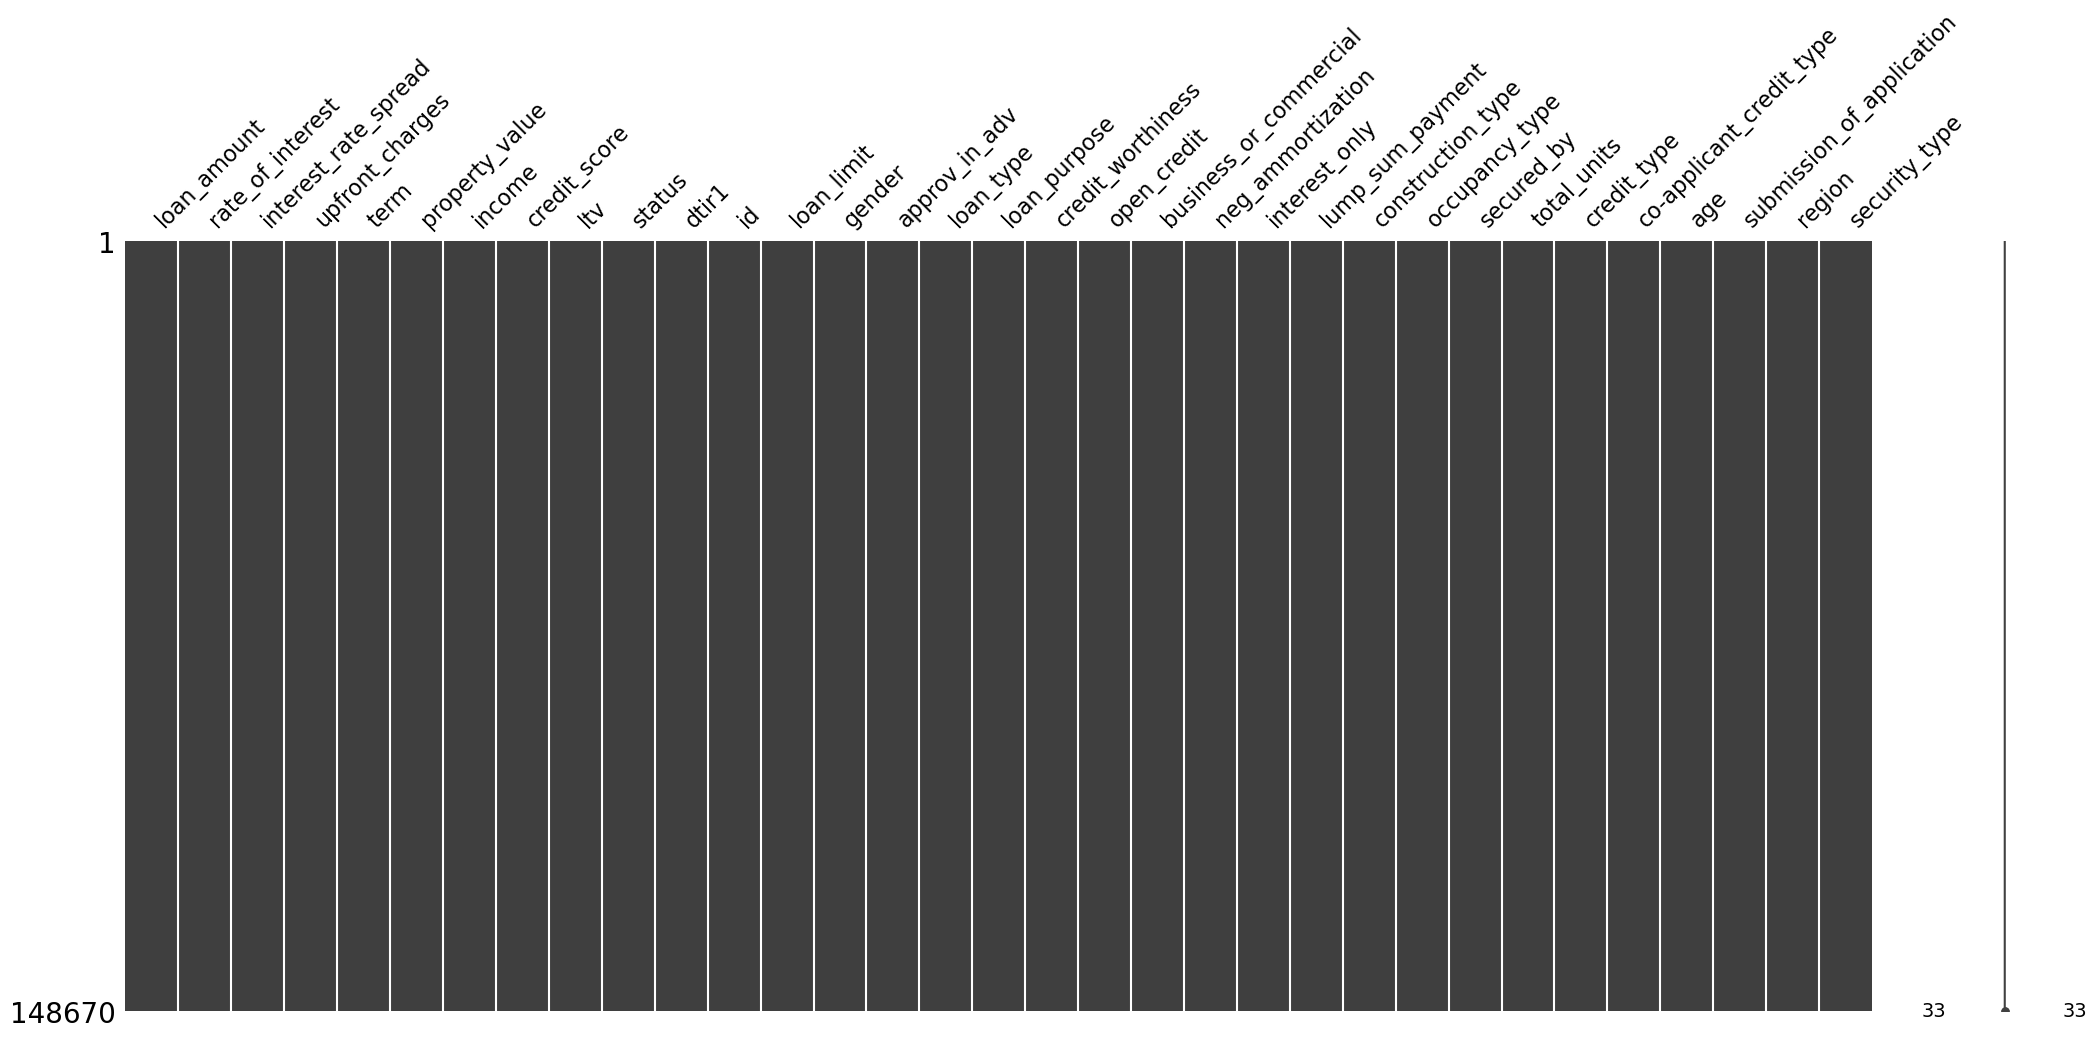

<Figure size 1500x900 with 0 Axes>

In [11]:
# Combining dataframes
df_full = pd.concat([df_num, df_cat], axis=1, join='inner')

# Full dataframe visualization of null values
msno.matrix(df_full)
plt.figure(figsize = (15,9))
plt.show()


In [12]:
# ====================================================================
# Outliers
# ====================================================================

df_num = df_full[num_vars]


def find_outliers_IQR(col):
   Q1=col.quantile(0.25)
   Q3=col.quantile(0.75)
   IQR=Q3-Q1
   outliers = col[((col<(Q1-3*IQR)) | (col>(Q3+3*IQR)))]
   return(outliers)

def outlier_prop(outliers, col):
    outlier_size = len(outliers)
    return outlier_size / (len(col) + outlier_size)


def delete_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lower = q1-3*IQR
    upper = q3+3*IQR
    df = df[(df[col] < upper) & (df[col] > lower)]
    return(df)


df_temp = df_full.copy()

# Both term and status are 15-20% outliers and can be treated as categorical variables
df_temp['term'] = df_temp['term'].astype(str)
df_temp['status'] = df_temp['status'].astype(str)


# Getting num_vars and cat_vars
dtypes = pd.DataFrame(df_temp.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)


# Getting proportion of 
outlier_props = []
cols = []
for i in num_vars:
    outliers = find_outliers_IQR(df_temp[i])
    cols.append(i)
    prop = outlier_prop(outliers, df_temp[i])
    outlier_props.append(prop)

outlier_props_df = pd.DataFrame([cols, outlier_props], index=['Variable', 'OutlierProp']).transpose()

In [13]:
# Deleting outliers
for col in num_vars:
    q1 = df_temp[col].quantile(0.25)
    q3 = df_temp[col].quantile(0.75)
    IQR = q3-q1
    lower = q1-3*IQR
    upper = q3+3*IQR
    df_temp = df_temp[(df_temp[col] < upper) & (df_temp[col] > lower)]
    
df_full = df_temp

In [14]:

# Term
term_vals = pd.DataFrame(df_full['term'].value_counts().reset_index())

# Drop terms that have less than 10 appearences in dataset
terms_to_drop = []
for i, l in zip(term_vals['index'], term_vals['term']):
    if l < 10:
        terms_to_drop.append(i)

for i in terms_to_drop:
    df_full = df_full[df_full['term'] != i]

# Remaining Data
proportion_remaining = round(len(df_full) / len(df), 5)
proportion_dropped = round(1 - proportion_remaining, 2) * 100
dropped = len(df) - len(df_full)
print("We dropped ", dropped, ' rows from the dataset')
print("That is about", proportion_dropped, "% of the original dataset" )
print("The proportion of the original dataset remaining is:  ", proportion_remaining)

We dropped  4812  rows from the dataset
That is about 3.0 % of the original dataset
The proportion of the original dataset remaining is:   0.96763


In [15]:
# Make term categorical dtype
df_full['term'] = df_full['term'].astype('float')

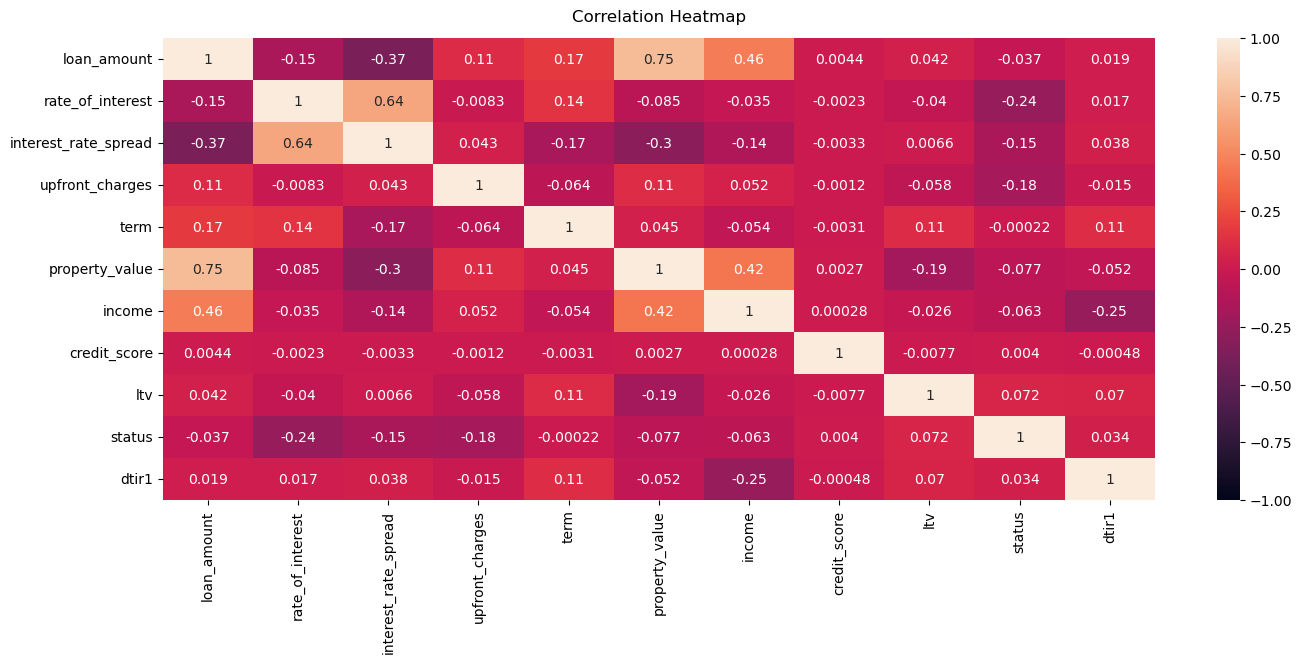

In [16]:
"""
# ====================================================================
# Data Exploration/Visualization
# ====================================================================
"""

# ====================================================================
# Numeric Data
# ====================================================================

# Correlation
corr = df_num.corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

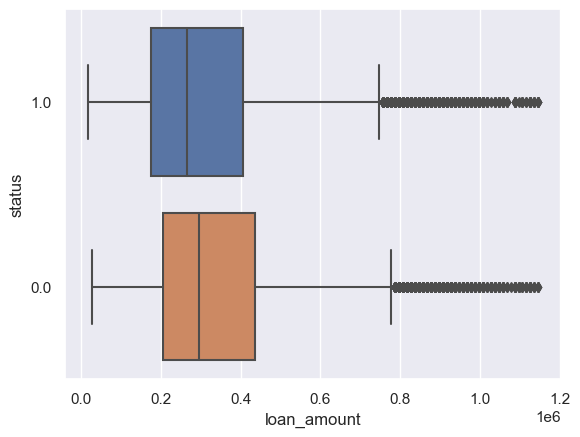

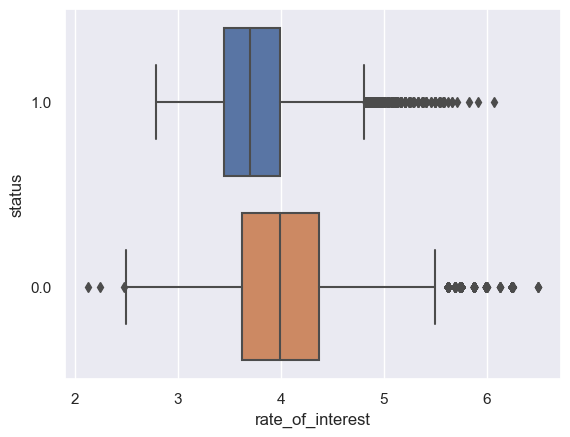

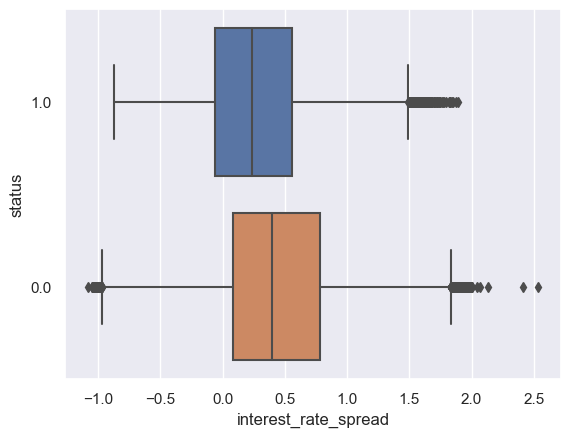

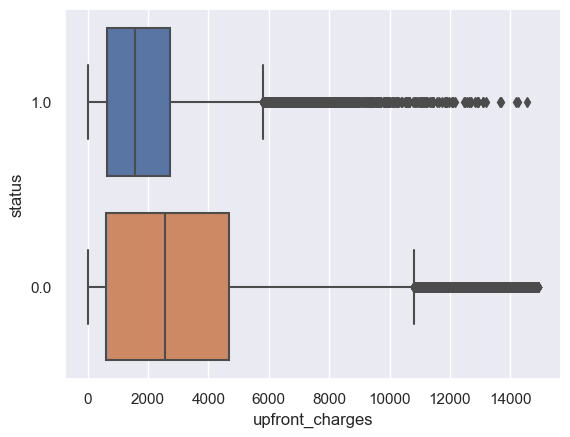

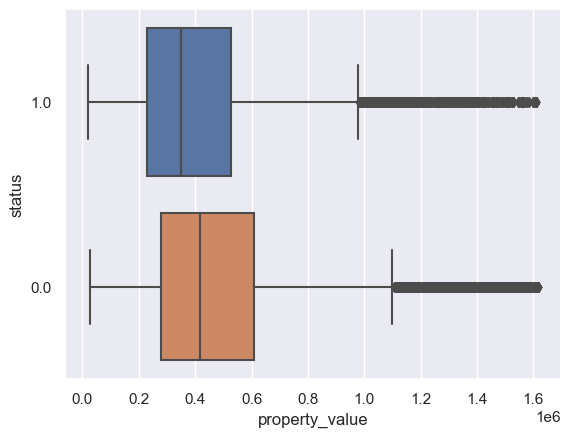

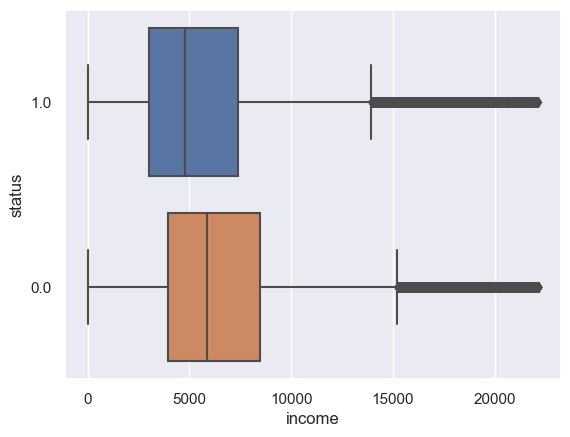

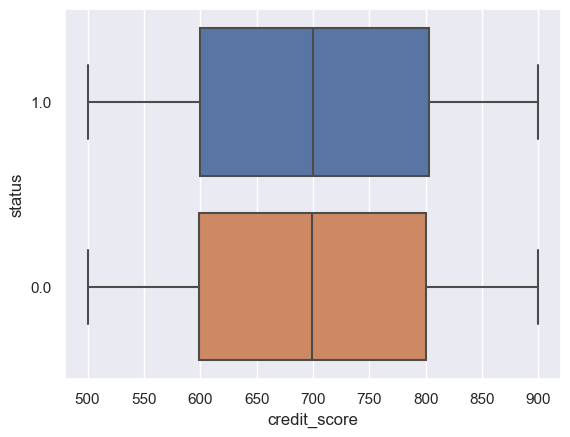

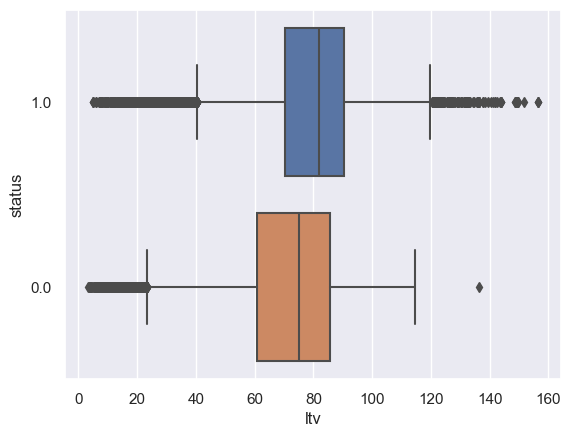

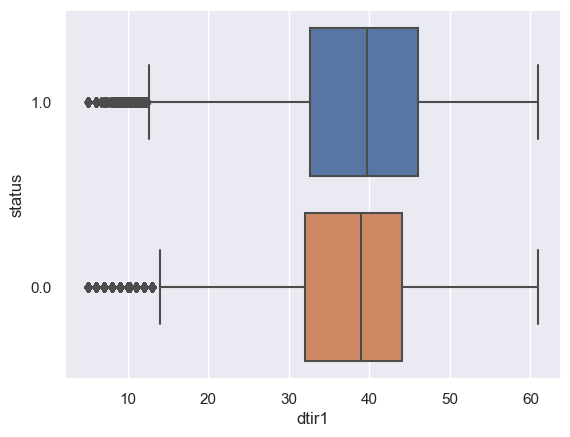

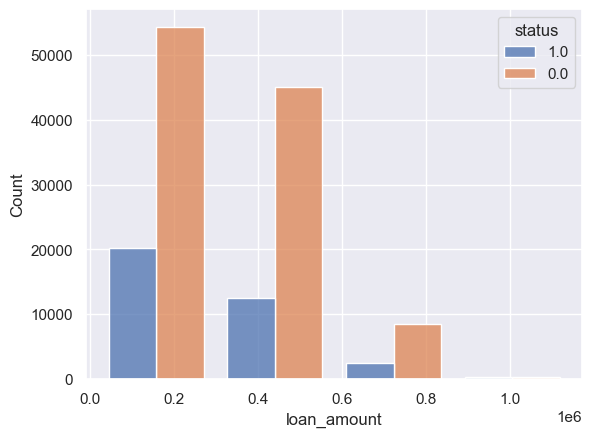

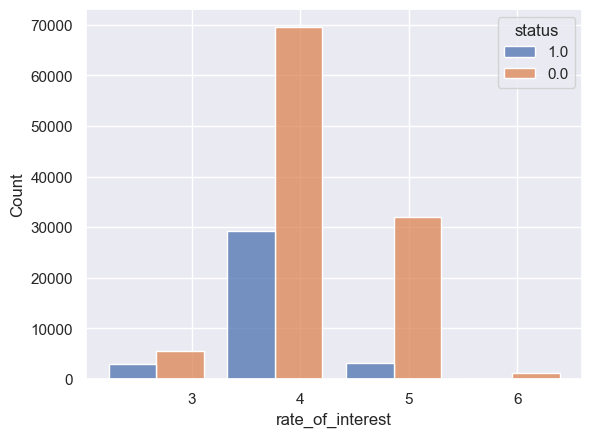

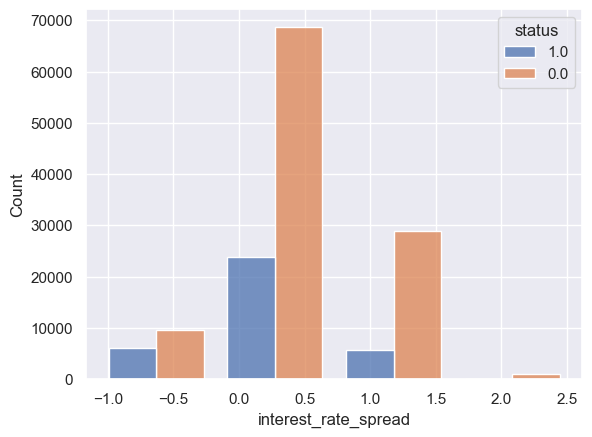

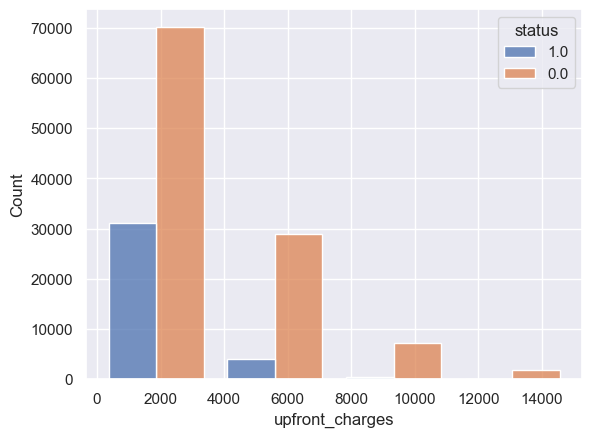

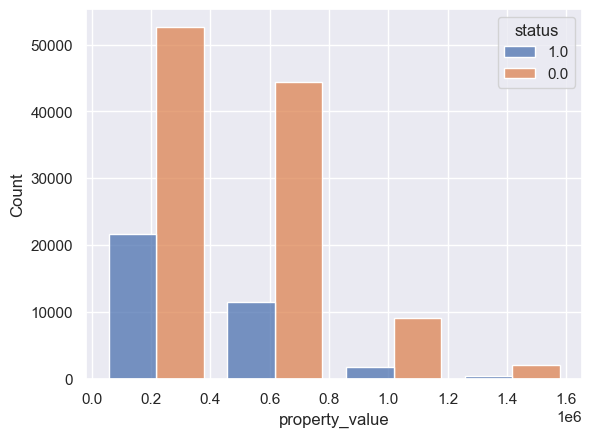

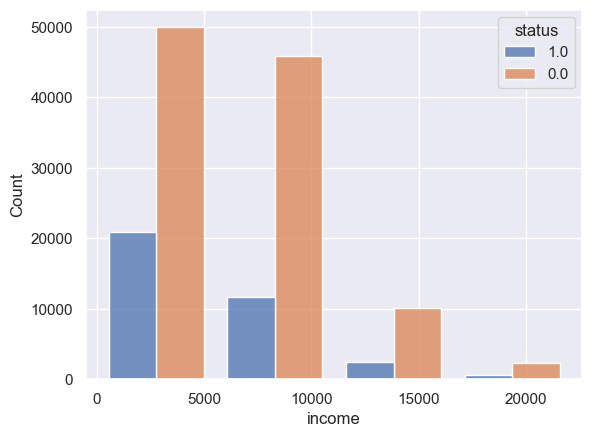

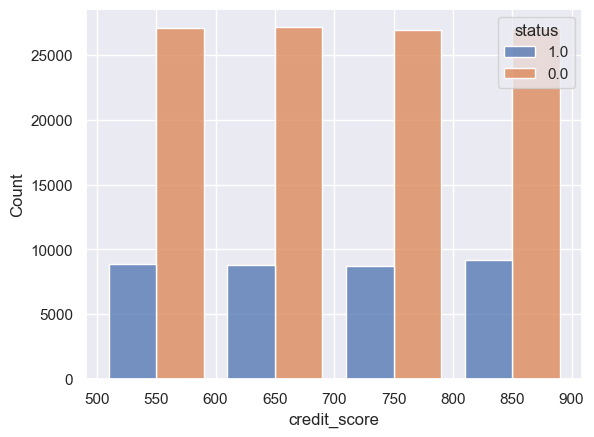

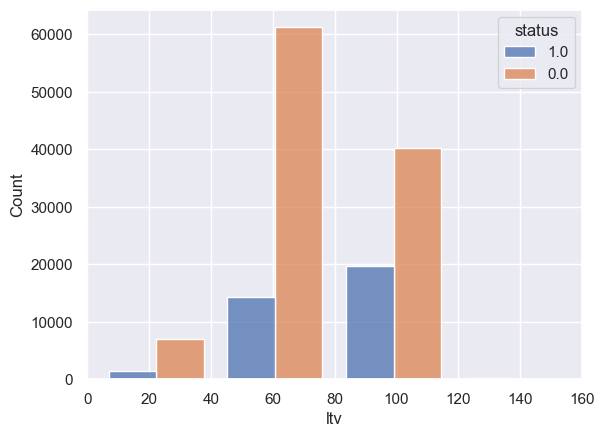

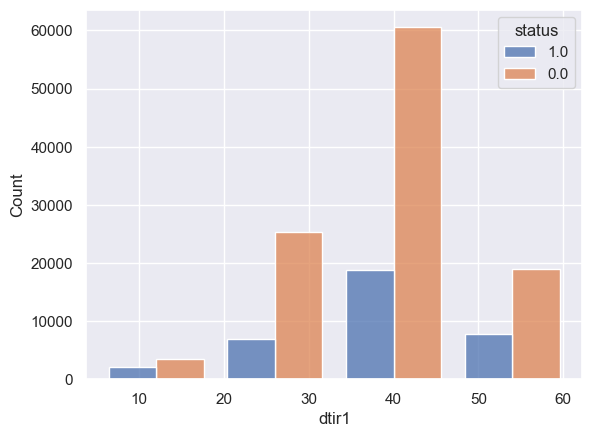

In [17]:
# We want to plot against Status since that is our target variable

# Boxplots
for i in num_vars:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.boxplot(x=i, y='status', data=df_full)
    plt.show()
    
# Histograms
for i in num_vars:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df_full, x=i, hue="status", multiple="dodge", shrink=.8, bins=4)
    plt.show()


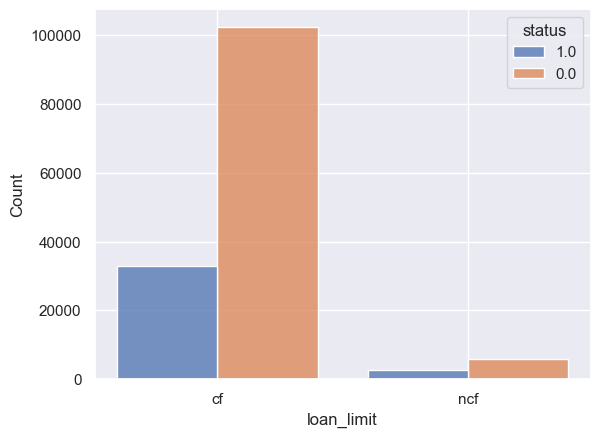

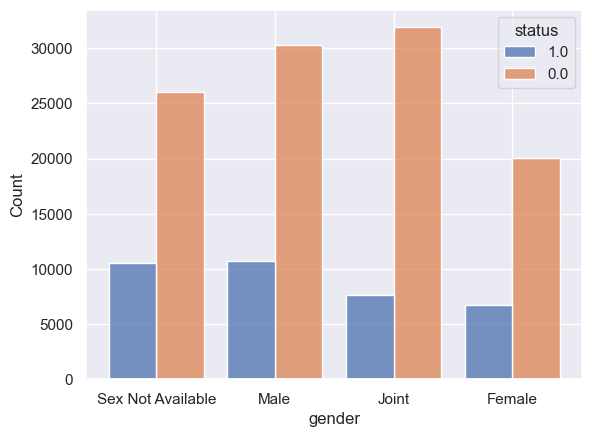

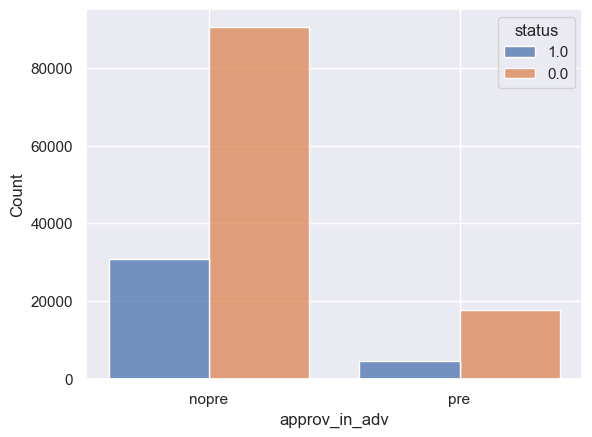

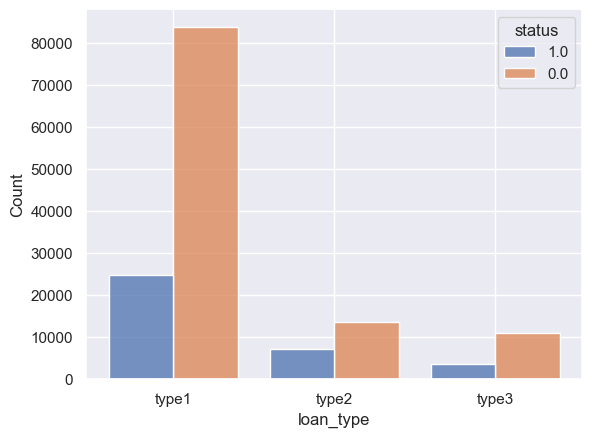

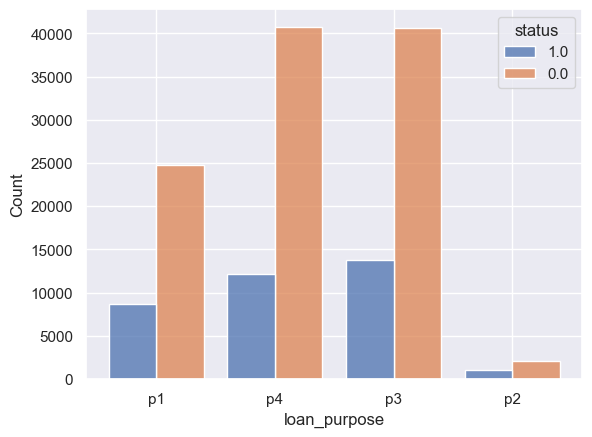

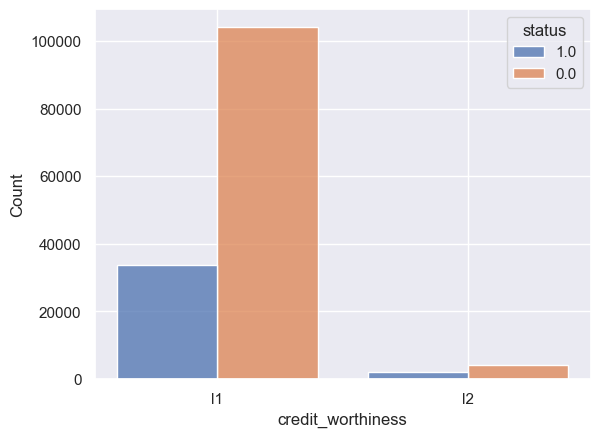

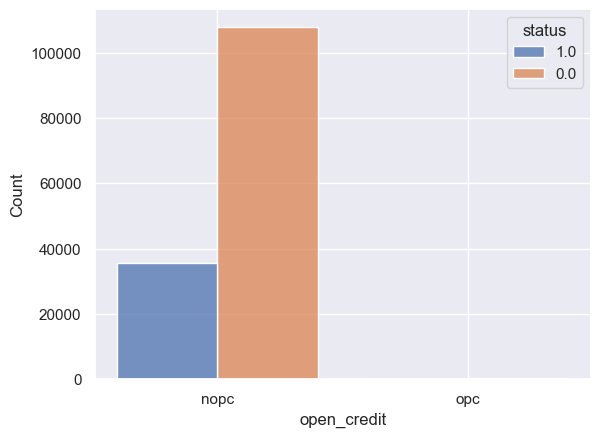

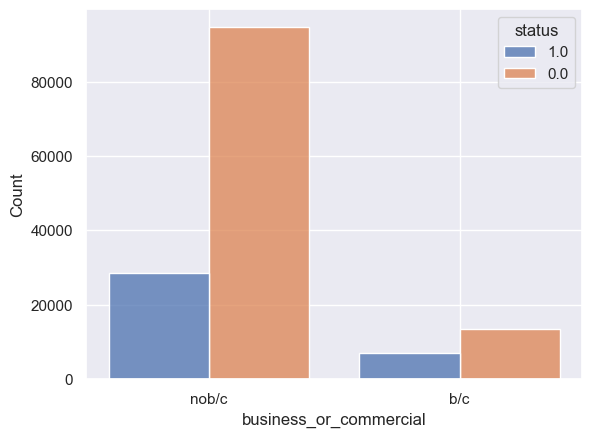

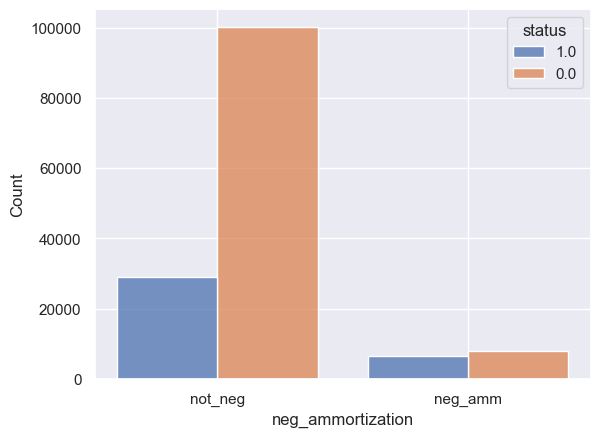

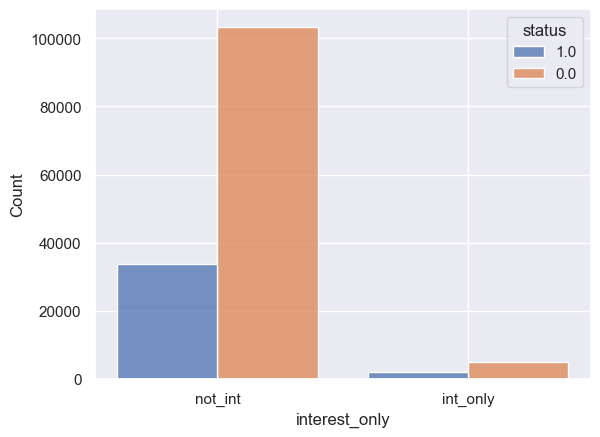

In [18]:
# ====================================================================
# Categorical Data
# ====================================================================

def plot_hist(col):
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df_full, x=col, hue="status", multiple="dodge", shrink=.8, stat='count')
    plt.show()


# loan_limit
plot_hist(df_full['loan_limit'])

# Gender
plot_hist(df_full['gender'])

# approved in advance
plot_hist(df_full['approv_in_adv'])

# loan_type
plot_hist(df_full['loan_type'])

# loan_purpose
plot_hist(df_full['loan_purpose'])

# Credit worthiness
plot_hist(df_full['credit_worthiness'])

# Open credit
plot_hist(df_full['open_credit'])

# Business or commercial
plot_hist(df_full['business_or_commercial'])

# neg_ammortization
plot_hist(df_full['neg_ammortization']) # neg_amm more likely to default

# interest_only
plot_hist(df_full['interest_only'])

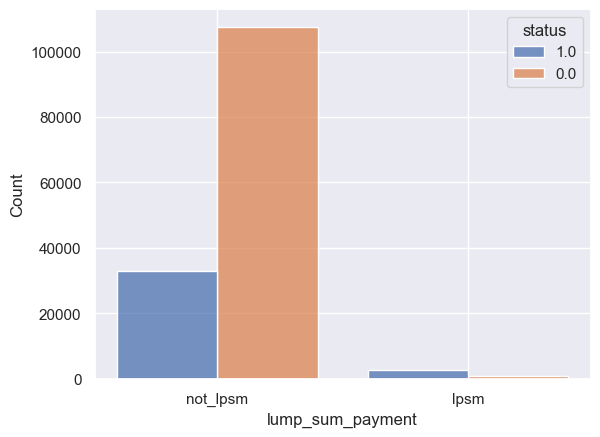

1.0    2555
0.0     736
Name: status, dtype: int64

In [19]:
# Lump sum payment
plot_hist(df_full['lump_sum_payment'])
df_full['lump_sum_payment'].value_counts()
lpsm = df_full[df_full['lump_sum_payment'] == 'lpsm']
lpsm['status'].value_counts() # Vast majority of lumpsum payments default

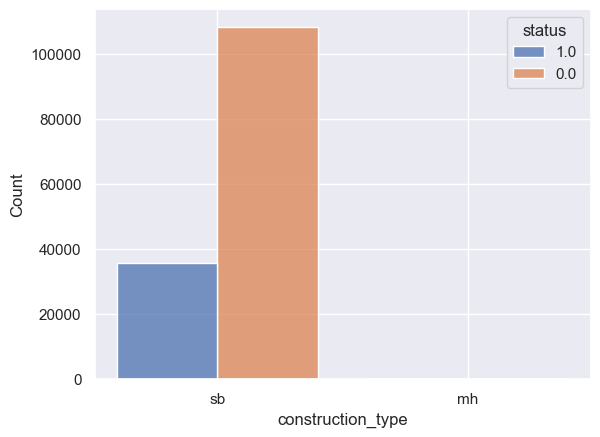

1.0    32
Name: status, dtype: int64

In [20]:
# Construction type
plot_hist(df_full['construction_type'])
df['construction_type'].value_counts() # Only 33 values for mh
mh = df_full[df_full['construction_type'] == 'mh']
mh['status'].value_counts() # All mh vals were defaults


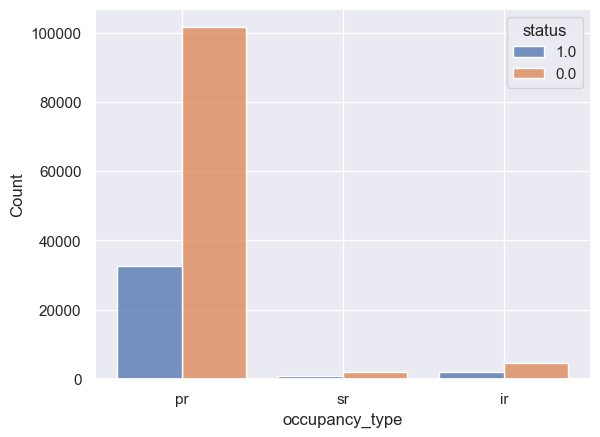

In [21]:
# occupancy_type
plot_hist(df_full['occupancy_type'])

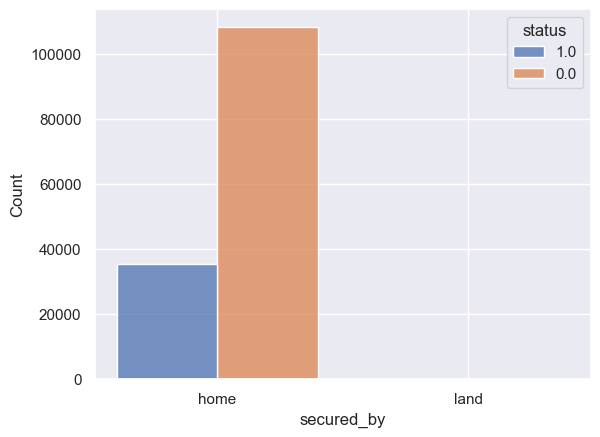

1.0    32
Name: status, dtype: int64

In [22]:
# secured_by
plot_hist(df_full['secured_by'])
df_full['secured_by'].value_counts()
land = df_full[df_full['secured_by'] == 'land']
land['status'].value_counts() # All land security defaulted

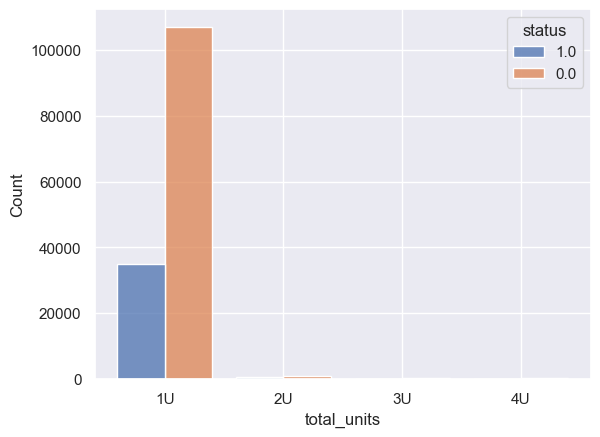

1U    141952
2U      1338
3U       324
4U       244
Name: total_units, dtype: int64

In [23]:
# total_units
plot_hist(df_full['total_units'])
df_full['total_units'].value_counts()

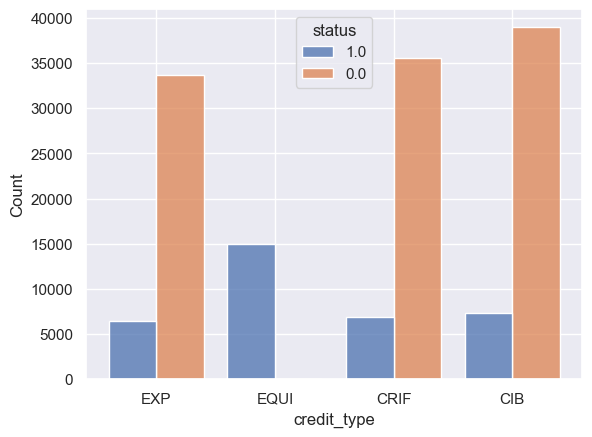

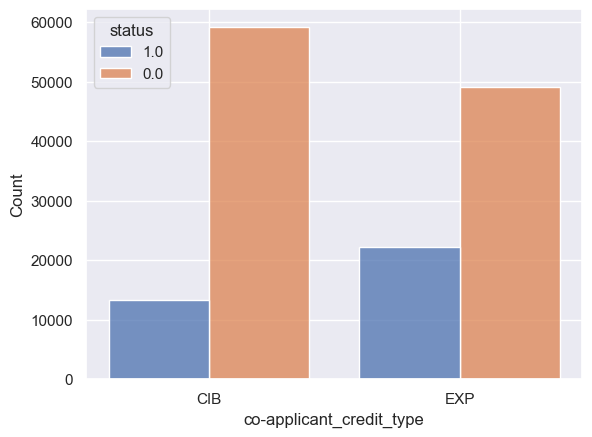

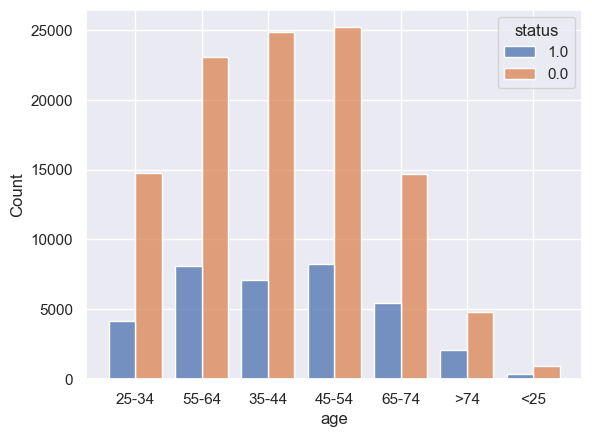

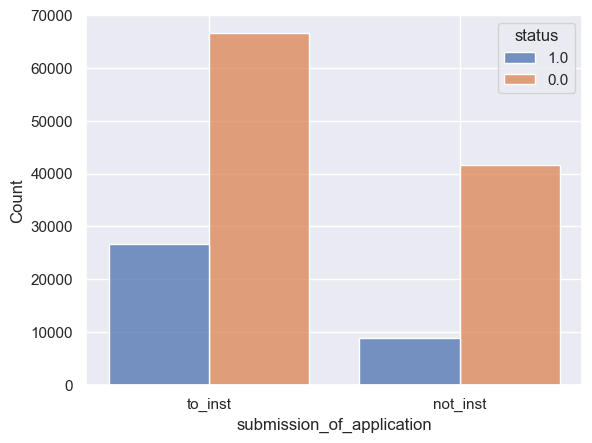

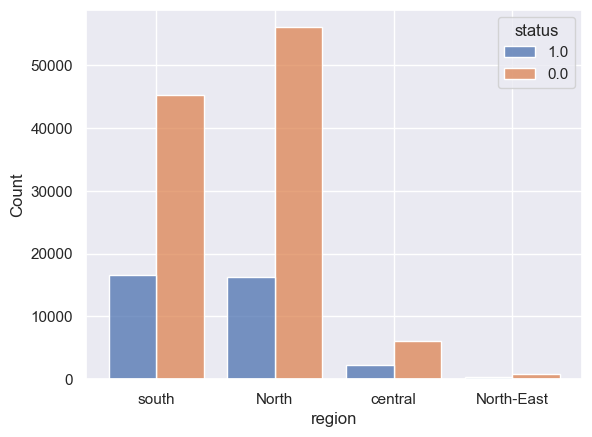

In [24]:
# credit_type
plot_hist(df_full['credit_type']) # All EQUI credit type defaults

# co-applicant_credit_type
plot_hist(df_full['co-applicant_credit_type'])

# age
plot_hist(df_full['age'])

# submission_of_application
plot_hist(df_full['submission_of_application'])

# region
plot_hist(df_full['region'])

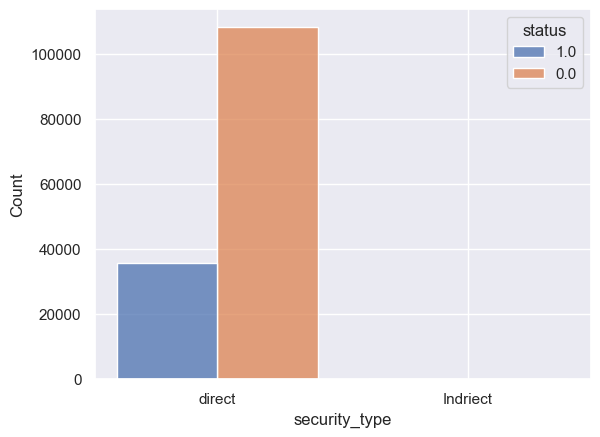

1.0    32
Name: status, dtype: int64

In [25]:
# security_type
plot_hist(df_full['security_type'])
df_full['security_type'].value_counts()
indirect = df_full[df_full['security_type'] == 'Indriect']
indirect['status'].value_counts() # All indirect security type defaults

In [26]:

"""
# ====================================================================
# Data Preprocessing
# ====================================================================
"""

# ====================================================================
# Encoding Categorical Variables
# ====================================================================

df_full.drop(columns=['id'], inplace=True)

dtypes = pd.DataFrame(df_full.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)



# Binary variables
binary_vars = ['security_type', 'submission_of_application', 'co-applicant_credit_type', 'secured_by',
               'lump_sum_payment', 'interest_only', 'neg_ammortization', 'construction_type', 'business_or_commercial',
               'open_credit', 'credit_worthiness', 'approv_in_adv', 'loan_limit', 'status']

# Label Encoder
label = LabelEncoder()
for i in binary_vars:
    df_full[i] = label.fit_transform(df_full[i])



# OneHotEncoding
df_cat = df_full[cat_vars]
df_cat.drop(columns=binary_vars, inplace=True)

df_cat.columns

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())


# Column names
cat_encoder.categories_
cat_columns = ['Female', 'Joint', 'Male', 'Sex Not Available',
               'type1', 'type2', 'type3',
               'p1', 'p2', 'p3', 'p4',
               'ir', 'pr', 'sr',
               'U1', 'U2', 'U3', 'U4',
               'CIB', 'CRIF', 'EQUI', 'EXP',
               'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'under_25', 'over_74',
               'North', 'North-East', 'central', 'south']

df_cat_encoded.columns = cat_columns
df_full.drop(columns=df_cat.columns, inplace=True)
# Concat
df = pd.concat([df_full, df_cat_encoded], axis=1, join='inner')


C:\Users\JHest\AppData\Local\Temp\ipykernel_1460\881509280.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=binary_vars, inplace=True)


In [27]:
# ====================================================================
# Splitting Data
# ====================================================================

# train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

y_train = train_set['status']
X_train = train_set.drop(columns=['status'])
y_test = test_set['status']
X_test = test_set.drop(columns=['status'])

In [28]:
"""
# ====================================================================
# Machine Learning: Classification
# ====================================================================
"""

# ====================================================================
# Random Forest Classifier: 0.911 accuracy on test set
# ====================================================================

# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
accuracy_score(y_test, rf_preds)
confusion_matrix(y_test, rf_preds)

array([[20463,   517],
       [ 1971,  4890]], dtype=int64)

In [29]:
# ====================================================================
# XGBoost Classifier: 0.9733 accuracy on test set
# ====================================================================

# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Scores on train set
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
accuracy_score(y_test, xgb_preds)
confusion_matrix(y_test, xgb_preds)

C:\Users\JHest\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JHest\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JHest\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JHest\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JHest\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JHest\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JHest\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JHest\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JHest\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JHest\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JHest\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JHest\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean cross-validation score: 0.97


array([[20843,   137],
       [  606,  6255]], dtype=int64)

In [30]:
# ====================================================================
# Naive Bayesian Classifer: 0.7865
# ====================================================================

# Fitting Model: Guassian
naive_bayes = GaussianNB()
naive_bayes.fit(X_train , y_train)

#Predict on test data
nb_preds = naive_bayes.predict(X_test)

# Test set performance: 0.7516
accuracy_score(y_test, nb_preds)
confusion_matrix(y_test, nb_preds)


# Fitting Model: Bernouli
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train , y_train)


#Predict on test data
nb_preds = naive_bayes.predict(X_test)

# Test set performance: 0.7865
accuracy_score(y_test, nb_preds)
confusion_matrix(y_test, nb_preds)

array([[20426,   554],
       [ 5390,  1471]], dtype=int64)